In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.utils import to_categorical
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from sklearn.metrics import confusion_matrix
import itertools

from keras.layers import Dense,Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam,Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


import os
print(os.listdir())

# Any results you write to the current directory are saved as output.

In [ ]:
sample =pd.read_csv('sample_submission.csv') #28 * 28 pixel
train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
img_size = 28 # image consists of 784 pixel which is 28 * 28 

In [6]:
Y = train['label'] # target data

In [7]:
X = train.drop(['label'],axis = 1) #train data

In [8]:
# Normalize the data
X = X / 255.0
test = test / 255.0

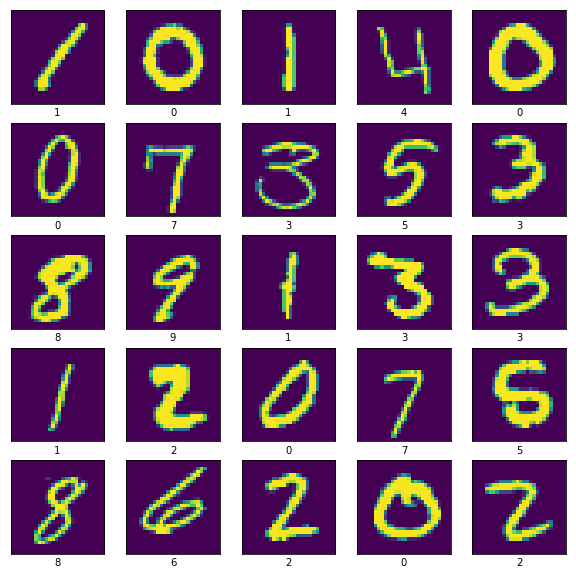

In [10]:
#The first 25 data point in train data and their labels
plt.figure(figsize = (10,10))
for i in range (25) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(Y[i])
    plt.imshow(X.iloc[i,:].values.reshape(img_size,img_size))

In [11]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [12]:
print("X_train shape is : ",X_train.shape)
print("Y_train shape is : ", Y_train.shape)
print("X_test shape is " , X_test.shape)
print("Y_test shape is " , Y_test.shape)

X_train shape is :  (35700, 784)
Y_train shape is :  (35700,)
X_test shape is  (6300, 784)
Y_test shape is  (6300,)


In [13]:
#Firstly I tried logistic regression , to see compare the result with neural networks.
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150,solver = 'sag', tol = 0.1,)

In [14]:
Y_train =Y_train.values.reshape(-1,1)

In [15]:
logreg.fit(X_train,Y_train )

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=150, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='sag', tol=0.1, verbose=0,
          warm_start=False)

In [16]:
print("test accuracy: {} ".format(logreg.score(X_test, Y_test)))
print("train accuracy: {} ".format(logreg.score(X_train, Y_train)))

test accuracy: 0.9114285714285715 
train accuracy: 0.924453781512605 


In [17]:
#keras optimizer for neural network
adamax =Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
#defining function for building neural network
def Classifier() :
    model = Sequential() # initialize neural network
    model.add(Dense(units = 240, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    model.add(Dense(units = 240, kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))#softmax is used for classification
    model.compile(optimizer = adamax, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model 

In [20]:
model = Classifier()

In [21]:
Y_train = to_categorical(Y_train) #we are using 1 hot encoding here

In [22]:
history = model.fit(X_train , Y_train,epochs = 10,batch_size = 150 )#fitting our model

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
35700/35700 [==============================] - 8s 225us/step - loss: 0.6478 - acc: 0.8259
Epoch 2/10
35700/35700 [==============================] - 5s 130us/step - loss: 0.2793 - acc: 0.9188
Epoch 3/10
35700/35700 [==============================] - 5s 127us/step - loss: 0.2235 - acc: 0.9347
Epoch 4/10
35700/35700 [==============================] - 5s 130us/step - loss: 0.1846 - acc: 0.9464
Epoch 5/10
35700/35700 [==============================] - 5s 127us/step - loss: 0.1563 - acc: 0.9548
Epoch 6/10
35700/35700 [==============================] - 5s 131us/step - loss: 0.1344 - acc: 0.9604
Epoch 7/10
35700/35700 [==============================] - 5s 136us/step - loss: 0.1162 - acc: 0.9670 3s - loss - ET
Epoch 8/10
35700/35700 [==============================] - 5s 133us/step - loss: 0.1011 - acc: 0.9708
Epoch 9/10
35700/35700 [==============================] - 5s 131us/step - loss: 0.0881 - acc: 0.9741
Epoch 10/10
35700/35700 [===

In [23]:
test_loss, test_acc = model.evaluate(X_train, Y_train) #evaluating our model
print('Test accuracy:', test_acc)

35700/35700 [==============================] - 4s 110us/step
Test accuracy: 0.9804481792717087


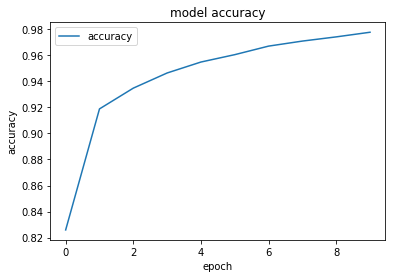

In [24]:
#Plottling accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

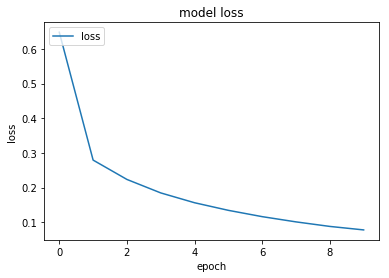

In [25]:
#Plotting loss values
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

In [26]:
prediction = model.predict(test) 

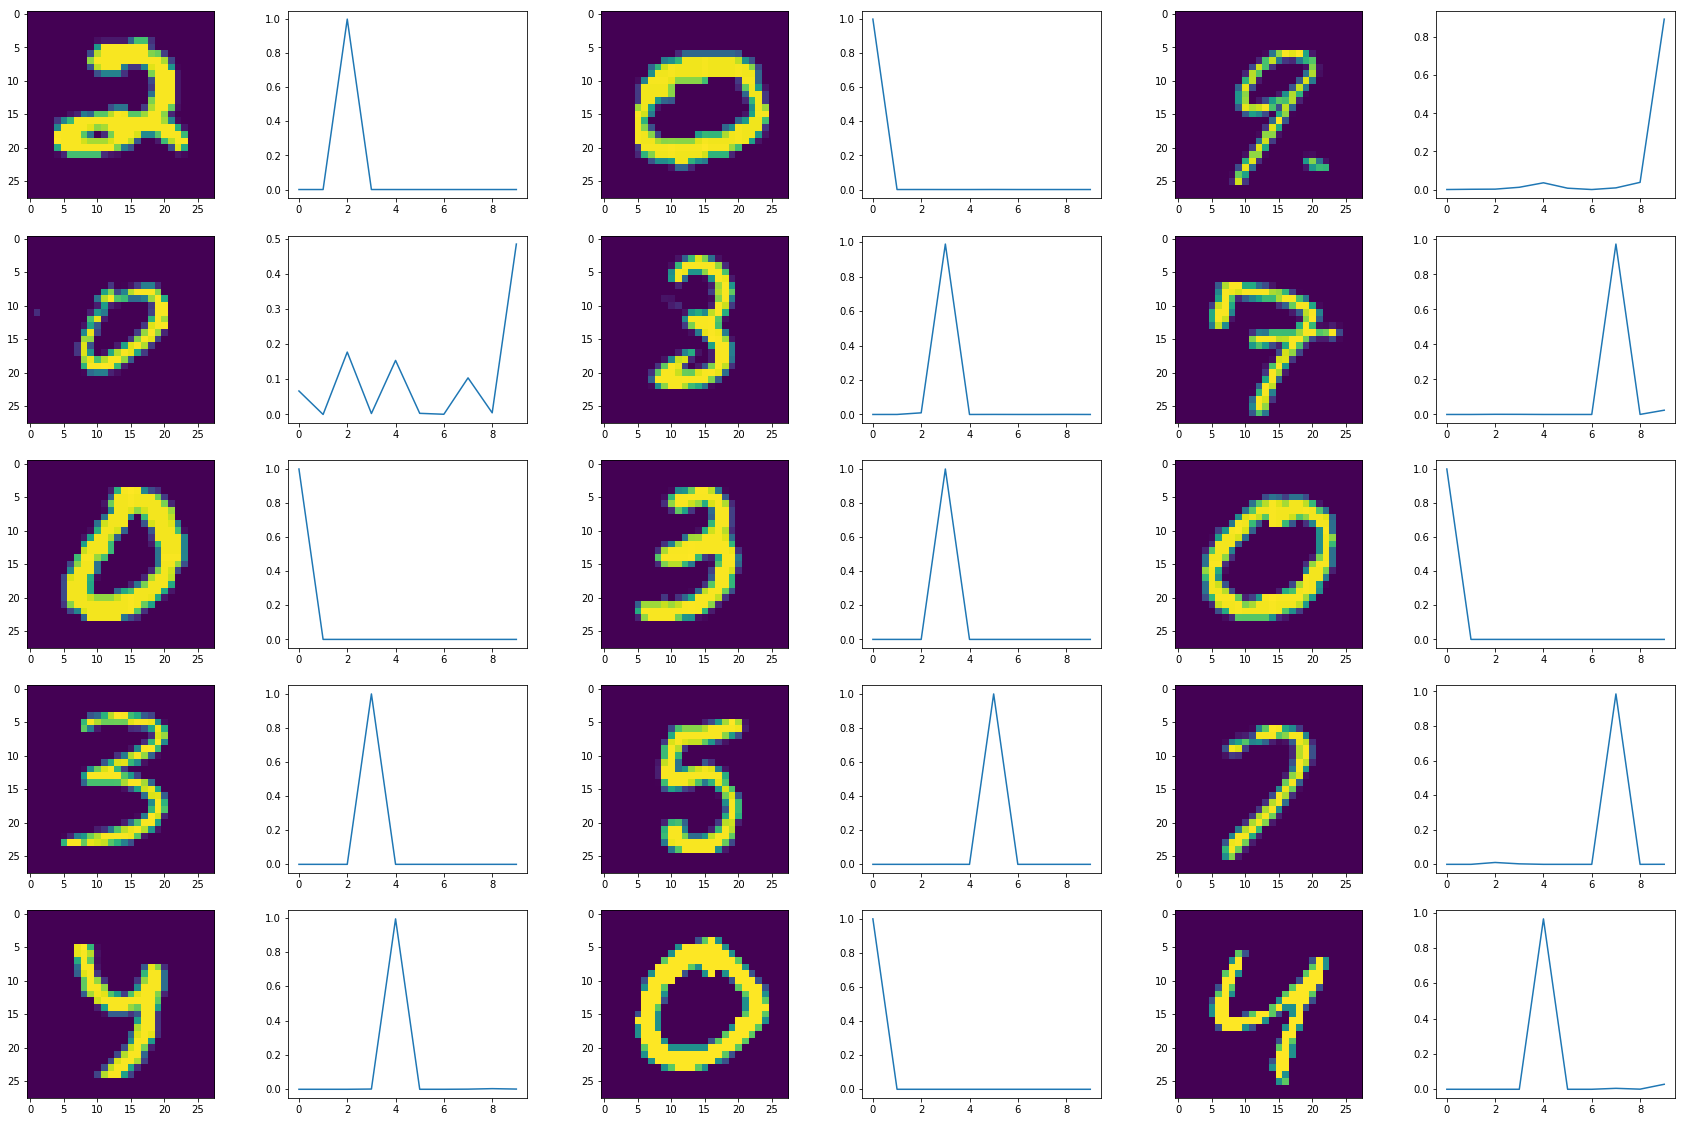

In [27]:
#First 15 samples of test database and result of them . It looks like we are taking corrects results
plt.figure(figsize = (30,20))
for i in range (15):
    plt.subplot(5,6, 1 + 2*i )
    plt.imshow(test.iloc[i].values.reshape(img_size,img_size))
    plt.subplot(5,6,2 +(2*i) )
    plt.plot(prediction[i])

In [28]:
#Creating our CNN MODEL
model3 = Sequential()

In [29]:
#Addıng layers to our CNN model
model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))


model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.25))


model3.add(Flatten())
model3.add(Dense(256, activation = "relu"))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation = "softmax"))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [30]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [31]:
model3.compile(optimizer  = optimizer , loss = 'categorical_crossentropy',metrics =['accuracy'])

In [32]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

In [33]:
#Data Reshaping 
X_train = X_train.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)
X_test = X_test.values.reshape(-1,28,28,1)
Y_test=to_categorical(Y_test , num_classes = 10)

In [34]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [36]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_test.shape)

x_train shape (35700, 28, 28, 1)
x_test shape (6300, 28, 28, 1)
y_train shape (35700, 10)
y_test shape (6300, 10)


In [ ]:
# Fit the model
history = model3.fit_generator(datagen.flow(X_train,Y_train, batch_size=140),epochs = 10, validation_data = (X_test,Y_test) )#steps_per_epoch=X_train.shape[0] // batch_size

In [ ]:
model3.evaluate(X_train,Y_train)

In [ ]:
test = test.values.reshape(-1,28,28,1)

In [ ]:
#Submit file
predictions_class = model3.predict_classes(test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions_class)+1)),
                         "Label": predictions_class})
submissions.to_csv("Submission.csv", index=False, header=True)